In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = r'E:\Scientific_DS\Datasets\digikala\digikala3\3-p5s3708k.csv'

In [3]:
data = pd.read_csv('E:/Scientific_DS/Datasets/digikala/digikala/3-p5s3708k.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
ID_Order                 200000 non-null int64
ID_Customer              200000 non-null int64
ID_Item                  200000 non-null int64
DateTime_CartFinalize    200000 non-null object
Amount_Gross_Order       200000 non-null float64
city_name_fa             200000 non-null object
Quantity_item            200000 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [5]:
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [6]:
Customer_shoping_number=data.ID_Customer.value_counts()

In [7]:
csn2 = (Customer_shoping_number.values>=2)
csn1 = (Customer_shoping_number.values==1)

In [8]:
indx=['1','2']
vlu = [sum(csn1), sum(csn2)]

<BarContainer object of 2 artists>

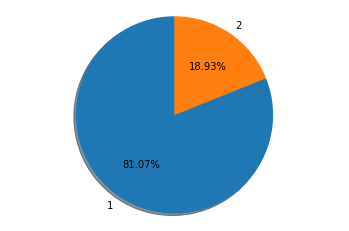

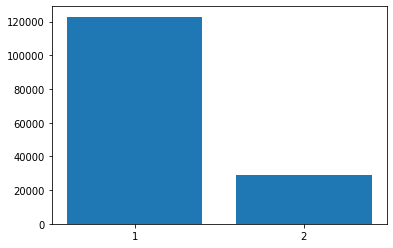

In [9]:
fig1,ax1= plt.subplots()
ax1.pie(vlu,labels=indx, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1,ax2= plt.subplots()
ax2.bar(indx, vlu)

In [10]:
data.Amount_Gross_Order.sum()

291640808763.0

In [11]:
two_buy = Customer_shoping_number[Customer_shoping_number.values>=2].keys()
one_buy = Customer_shoping_number[Customer_shoping_number.values==1].keys()

In [12]:
two_buy = list(two_buy)

In [13]:
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [14]:
a= sum(data[data.ID_Customer.isin(two_buy)].Amount_Gross_Order)
b= sum(data[data.ID_Customer.isin(one_buy)].Amount_Gross_Order)

In [15]:
twoBuy_df = data[data.ID_Customer.isin(two_buy)]
oneBuy_df = data[data.ID_Customer.isin(one_buy)]

In [16]:
b/a

2.310408978370875

([<matplotlib.patches.Wedge at 0x1ecef843828>,
 [Text(-0.8941195550531712, 0.6407419303210298, 'two buy'),
  Text(0.8941195550531711, -0.6407419303210299, 'one_buy')],
 [Text(-0.48770157548354787, 0.3494955983569253, '30.21%'),
  Text(0.48770157548354776, -0.3494955983569254, '69.79%')])

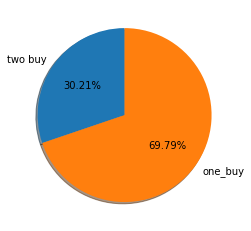

In [17]:
fig1,ax1= plt.subplots()
ax1.pie([a,b],labels=['two buy', 'one_buy'], autopct='%1.2f%%',
        shadow=True, startangle=90)

In [18]:
date = data.loc[1]['DateTime_CartFinalize']

In [19]:
date

'2018-02-11 00:29:26.000'

In [20]:
y = int(date[:4])
m = int(date[5:7])
d = int(date[8:10])
print(y,m,d)

2018 2 11


In [21]:
twoBuy_df= twoBuy_df.sort_values(by=['ID_Customer'])
oneBuy_df= oneBuy_df.sort_values(by=['ID_Customer'])

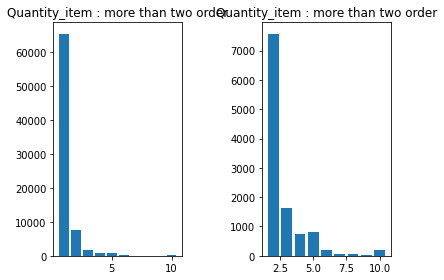

In [22]:
x = twoBuy_df.Quantity_item.value_counts().sort_index()
fig3,(ax1, ax2) = plt.subplots(1,2)
#fig3,ax1= plt.subplots(121)
ax1.bar(x.keys()[:10], x.values[:10])
ax1.set_title('Quantity_item : more than two order')
#fig3,ax2= plt.subplots()
ax2.bar(x.keys()[1:10], x.values[1:10])
ax2.set_title('Quantity_item : more than two order')
fig3.tight_layout()

Text(0.5, 1.0, 'Quantity_item : just one order')

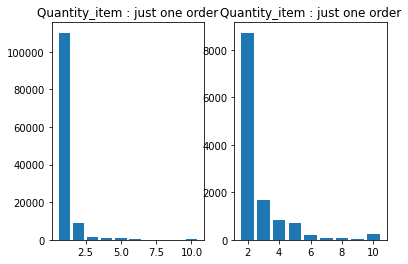

In [23]:
x = oneBuy_df.Quantity_item.value_counts().sort_index()
fig3,(ax1, ax2) = plt.subplots(1,2)
#fig3,ax1= plt.subplots(121)
ax1.bar(x.keys()[:10], x.values[:10])
ax1.set_title('Quantity_item : just one order')
#fig3,ax2= plt.subplots()
ax2.bar(x.keys()[1:10], x.values[1:10])
ax2.set_title('Quantity_item : just one order')

In [24]:
data.ID_Item.value_counts().sort_values()

840449       1
1018003      1
747663       1
1794190      1
598206       1
1237182      1
340164       1
351377       1
119000       1
1804563      1
753938       1
467206       1
723203       1
362552       1
585980       1
1360122      1
1216944      1
841977       1
557298       1
37104        1
1292437      1
18667        1
1294490      1
518303       1
203137       1
53624        1
305527       1
297331       1
33138        1
825713       1
          ... 
479349     102
43106      102
137583     106
44653      107
54850      108
295740     108
128133     111
163090     114
82966      115
143130     119
94233      119
20215      122
245223     124
77707      127
12532      128
129574     129
118375     131
294923     131
42124      141
7225       146
153067     149
294943     155
22839      160
19890      168
416448     175
8289       233
45121      259
51778      288
36871      367
294942     481
Name: ID_Item, Length: 95232, dtype: int64

In [25]:
dates_df = data.DateTime_CartFinalize

In [26]:
dates_df.head()

0    2015-10-15 08:50:56.000
1    2018-02-11 00:29:26.000
2    2016-06-14 00:30:08.000
3    2018-09-03 14:37:19.000
4    2016-05-21 11:51:02.000
Name: DateTime_CartFinalize, dtype: object

In [27]:
import re

In [28]:
d1 = dates_df.loc[1]

In [29]:
type(d1)

str

In [30]:
re.split('\s',d1)

['2018-02-11', '00:29:26.000']

In [31]:
from datetime import datetime

In [32]:
d1

'2018-02-11 00:29:26.000'

In [33]:
a1= datetime.strptime('2018-02-11 00:20:26.000', '%Y-%m-%d %H:%M:%S.%f')
a2= datetime.strptime('2018-03-11 00:29:26.000', '%Y-%m-%d %H:%M:%S.%f')

In [34]:
c= a2-a1

In [35]:
c.total_seconds()

2419740.0

In [36]:
c

datetime.timedelta(days=28, seconds=540)

In [37]:
28*3600*24 + 540

2419740

In [38]:
d2= dates_df.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [39]:
d2.head()

0   2015-10-15 08:50:56
1   2018-02-11 00:29:26
2   2016-06-14 00:30:08
3   2018-09-03 14:37:19
4   2016-05-21 11:51:02
Name: DateTime_CartFinalize, dtype: datetime64[ns]

In [40]:
d2.loc[2] - d2.loc[3]

Timedelta('-812 days +09:52:49')

In [41]:
dates_df.head()

0    2015-10-15 08:50:56.000
1    2018-02-11 00:29:26.000
2    2016-06-14 00:30:08.000
3    2018-09-03 14:37:19.000
4    2016-05-21 11:51:02.000
Name: DateTime_CartFinalize, dtype: object

In [42]:
vv = data.head()

In [43]:
vv

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [44]:
vv['newdat'] = vv.DateTime_CartFinalize.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f') )

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
vv.loc[0].DateTime_CartFinalize

'2015-10-15 08:50:56.000'

In [46]:
vv.sort_values(by = ['newdat'])

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,newdat
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015-10-15 08:50:56
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016-05-21 11:51:02
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016-06-14 00:30:08
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018-02-11 00:29:26
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018-09-03 14:37:19


In [47]:
vv

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,newdat
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015-10-15 08:50:56
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018-02-11 00:29:26
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016-06-14 00:30:08
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018-09-03 14:37:19
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016-05-21 11:51:02


In [48]:
vv.newdat.min()

Timestamp('2015-10-15 08:50:56')

In [49]:
data['newdate'] = data.DateTime_CartFinalize.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f') )

In [50]:
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,newdate
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015-10-15 08:50:56
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018-02-11 00:29:26
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016-06-14 00:30:08
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018-09-03 14:37:19
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016-05-21 11:51:02


In [51]:
mask = data.newdate<datetime(2016,1,1,0,0,0,0)

In [52]:
data_sorted = data.sort_values(by = ['newdate'])

In [53]:
datetime(2016,1,1,0,0,0,0)

datetime.datetime(2016, 1, 1, 0, 0)

In [54]:
data_sorted.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,newdate
69768,1000740,609924,6906,2013-09-27 12:03:00.000,812453.0,قم,1.0,2013-09-27 12:03:00
153955,1000411,720568,8777,2013-09-27 19:43:00.000,3254717.0,تهران,1.0,2013-09-27 19:43:00
72224,1000977,695557,3136,2013-09-27 22:26:00.000,8764151.0,شهرکرد,1.0,2013-09-27 22:26:00
185193,1000919,470250,1532,2013-09-28 12:04:00.000,926226.0,زنجان,2.0,2013-09-28 12:04:00
160662,1002123,531450,8045,2013-09-29 22:08:00.000,9433585.0,رشت,1.0,2013-09-29 22:08:00


In [55]:
def digi_param(dt, date1,date2):
    count = dt[(dt.newdate>=date1)&(dt.newdate<date2)].shape[0]
    Quantity_item = dt[(dt.newdate>=date1)&(dt.newdate<date2)].Quantity_item
    Amount_Gross_Order = dt[(dt.newdate>=date1)&(dt.newdate<date2)].Amount_Gross_Order
    p1 = Amount_Gross_Order.sum() / Quantity_item.sum()
    p2 = (Quantity_item.mean(), Quantity_item.std() )
    p3 = (Amount_Gross_Order.mean(), Amount_Gross_Order.std())
    return p1, p2, p3

In [56]:
p1 =[]
p2 =[]
p3 =[]
for i in range(2013,2019):
    t1, t2, t3 = digi_param(data_sorted, datetime(i,1,1,0,0,0,0),datetime(i+1,1,1,0,0,0,0))
    p1.append(t1)
    p2.append(t2)
    p3.append(t3)

In [57]:
p3[0][0]

4256661.698245614

In [58]:
p1

[3875874.07028754,
 2885962.240173724,
 1428563.1220012214,
 1066298.5262127088,
 1107458.750628277,
 1086008.5898558619]

In [59]:
dates = [datetime(2013,1,1,0,0,0,0), datetime(2014,1,1,0,0,0,0)]

In [60]:
y = 2015
datetime(y,1,1,0,0,0,0)

datetime.datetime(2015, 1, 1, 0, 0)

In [61]:
indx = ['2013','2014','2015','2016','2017','2018']
vlu = [285,4283,19265,39211,61019,75937]

<BarContainer object of 6 artists>

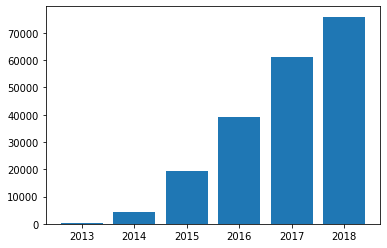

In [62]:
plt.bar(indx, vlu)

In [63]:
data_sorted.Amount_Gross_Order.std()

5450972.068802768

In [64]:
data_sorted.Amount_Gross_Order.mean()

1458204.043815

In [65]:
1458204.043815 **2

2126359033398.4185

In [66]:
p = ()

In [67]:
p[0] = 1
p[2] = 2

TypeError: 'tuple' object does not support item assignment

In [88]:
x= data_sorted.newdate

In [70]:
a = x.loc[0]

In [78]:
a.hour

8

In [79]:
x.loc[0]

Timestamp('2015-10-15 08:50:56')

In [83]:
x.loc[[1:3]]

SyntaxError: invalid syntax (<ipython-input-83-89be65c1d988>, line 1)

In [94]:
x = x.apply(lambda y: y.hour)
y = x.value_counts()

In [97]:
y = x.value_counts()

In [99]:
y.max()

13392

In [101]:
y.keys()

Int64Index([ 0, 12, 13, 14, 11, 15, 23, 10, 16, 22, 21, 17, 20, 19, 18,  1,  9,
             8,  2,  3,  7,  4,  6,  5],
           dtype='int64')

In [102]:
y.values

array([13392, 13086, 12749, 12646, 12458, 11934, 11139, 10949, 10519,
       10300,  9579,  9262,  9189,  9170,  8994,  8687,  8139,  4859,
        4740,  2382,  2287,  1301,  1235,  1004], dtype=int64)

In [105]:
y= y.sort_index()

Text(0.5, 1.0, 'hourly buy count')

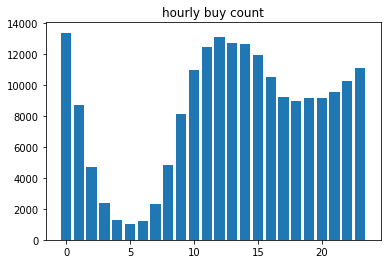

In [110]:
plt.bar(list(y.keys()), y.values)
plt.title('hourly buy count')

Text(0.5, 1.0, 'dayli buy count')

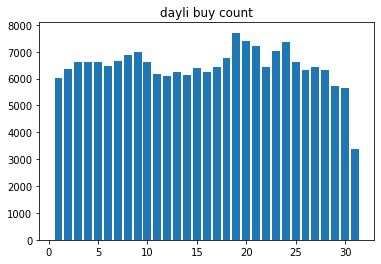

In [116]:
x_= data_sorted.newdate
x = x_.apply(lambda z: z.day)
y = x.value_counts()
plt.bar(list(y.keys()), y.values)
plt.title('dayli buy count')

Text(0.5, 1.0, 'monthly buy count')

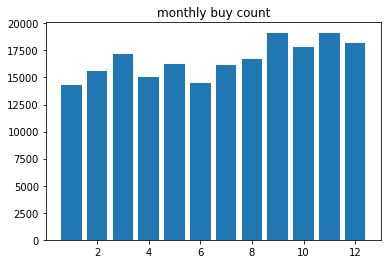

In [121]:
x_= data_sorted.newdate
x = x_.apply(lambda z: z.month)
y = x.value_counts()
plt.bar(list(y.keys()), y.values)
plt.title('monthly buy count')

In [119]:
x_.loc[1].month

2

In [120]:
x_.loc[1]

Timestamp('2018-02-11 00:29:26')

Text(0.5, 1.0, 'yearly buy count')

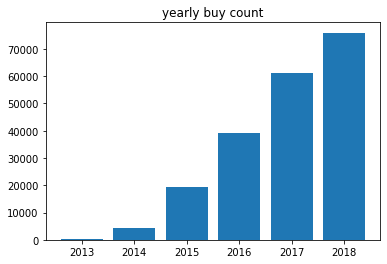

In [122]:
x_= data_sorted.newdate
x = x_.apply(lambda z: z.year)
y = x.value_counts()
plt.bar(list(y.keys()), y.values)
plt.title('yearly buy count')

In [131]:
data2 = pd.read_excel('E:/Scientific_DS/Datasets/digikala/digikala/5-awte8wbd.xlsx')

In [132]:
data2.head()

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لو...,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه ...",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 می...,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-می...,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره""..."
3,727803,ست لحاف پوپلین هوبی مدل اما یکنفره چهار تکه کاوری,Hobby Emma Quilt Single Set - 4 Pieces,ست-لحاف-پوپلین-هوبی-مدل-اما-یکنفره-چهار-تکه-کاوری,روتختی اسپرت، اما، emma، روتختی یکنفره، لحاف ی...,سرویس خواب,سرویس خواب SleepSet,هوبی,Hobby,"[{""Key"":""ابعاد رو بالشی"",""Value"":""50×70""},{""Ke..."
4,725222,ماگ آبنبات رنگی مدل AR0143,NaN,ماگ-آبنبات-رنگی-مدل-ar0143,ماگ آبنبات رنگی،شذدشذشفقشدله،Mag Abnabatrangi,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,متفرقه,Miscellaneous,"[{""Key"":""در"",""Value"":""ندارد""},{""Key"":""جنس"",""Va..."
